<a href="https://colab.research.google.com/github/jokercsi/Investment-Portfolio-Optimization/blob/main/textMiningVADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [47]:
# ライブラリの読み込み
import glob
import shutil
import os

import numpy as np
import pandas as pd

In [76]:
data = pd.read_csv('investingCom8.csv')
data['Title']

0                                             sampleTitle
1       McDonald's ordered to face Byron Allen's $10 b...
2       Stock Market Today: Dow Slides as Focus Shifts...
3       Big bank CEOs to sell lawmakers on relief, div...
4       Elon Musk faces skeptics as Tesla gets ready t...
                              ...                        
2681    U.S. trade chief Tai says getting 'traction' w...
2682    Wall Street ends lower as economic data raises...
2683    Stocks slip, dollar gains as US CPI sparks tig...
2684    S&P 500 Closes Lower as Soaring Inflation Rein...
2685    Rivian, Inflation Effects, Oil Market: 3 Thing...
Name: Title, Length: 2686, dtype: object

In [49]:
data['Title'] = data['Title'].str.lower()
data

,Unnamed: 0,Title,Date,Publisher
0,0,sampletitle,sampleDate,samplePublisher
1,1,mcdonald's ordered to face byron allen's $10 b...,2022-09-20 00:00:00,Reuters
2,2,stock market today: dow slides as focus shifts...,2022-09-20 00:00:00,Investing.com
3,3,"big bank ceos to sell lawmakers on relief, div...",2022-09-20 00:00:00,Reuters
4,4,elon musk faces skeptics as tesla gets ready t...,2022-09-20 00:00:00,Reuters
...,...,...,...,...
2681,2681,u.s. trade chief tai says getting 'traction' w...,2021-11-10 00:00:00,Reuters
2682,2682,wall street ends lower as economic data raises...,2021-11-10 00:00:00,Reuters
2683,2683,"stocks slip, dollar gains as us cpi sparks tig...",2021-11-10 00:00:00,Reuters
2684,2684,s&p 500 closes lower as soaring inflation rein...,2021-11-10 00:00:00,Investing.com


In [50]:
NN_words = []

for i in data['Title']:
  # 토큰화
  word_tokens = nltk.word_tokenize(i)
  # 품사 분리
  tokens_pos = nltk.pos_tag(word_tokens)

  for word, pos in tokens_pos:
      if 'NN' in pos:
          NN_words.append(word)


#print(NN_words)

In [51]:
NN_words = []

for i in data['Title']:
  # 토큰화
  word_tokens = nltk.word_tokenize(i)
  # 품사 분리
  tokens_pos = nltk.pos_tag(word_tokens)

  for word, pos in tokens_pos:
      if 'NN' in pos:
          NN_words.append(word)




In [52]:
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['sampletitle', 'mcdonald', 'byron', 'allen', 'discrimination', 'lawsuit', 'stock', 'market', 'today', 'dow', 'slide', 'focus', 'shift', 'fed', 'bank', 'ceo', 'lawmaker', 'relief', 'diversity', 'effort', 'challenge', 'elon', 'musk', 'skeptic', "'optimus", 'robot', 'trump', 'medium', 'deal', 'vote', 'roubini', 'dr.', 'doom', 'recession', 'bloomberg', 'stock', 'fed', 'policy', 'meeting', 'stock', 'producer', 'price', 'record', 'level', 'street', 'end', 'session', 'focus', 'fed', 'meat', 'coo', 'charge', 'threatening', 'battery', 'stock', 'market', 'today', 'dow', 'comeback', 'dip-buyers', 'tech', 'yield', 'jump', 'teva', 'pharm', 'settlement', 'merger', 'deal', 'sale', 'ben', 'jerry', 'founder', 'msnbc', 'stock', 'meeting', 'interest', 'rate', 'amazon', 'interactive', 'fall', 'premarket', 'autozone', 'rise', 'dow', 'future', 'pt', 'meeting', 'stock', 'caution', 'reserve', 'meeting', 'dow', 'future', 'index', 'week', 'june', 'market', 'investor', 'cash', 'inflation', 'iphones', 'modem', '

In [53]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [54]:
# 실제 작업시에는 txt 파일로 작업하는 걸 추천
customized_stopwords = ['be', 'today', 'yesterday', "it’s", "don’t"] # 직접 만든 불용어 사전

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words)

['sampletitle', 'mcdonald', 'byron', 'allen', 'discrimination', 'lawsuit', 'stock', 'market', 'dow', 'slide', 'focus', 'shift', 'fed', 'bank', 'ceo', 'lawmaker', 'relief', 'diversity', 'effort', 'challenge', 'elon', 'musk', 'skeptic', "'optimus", 'robot', 'trump', 'medium', 'deal', 'vote', 'roubini', 'dr.', 'doom', 'recession', 'bloomberg', 'stock', 'fed', 'policy', 'meeting', 'stock', 'producer', 'price', 'record', 'level', 'street', 'end', 'session', 'focus', 'fed', 'meat', 'coo', 'charge', 'threatening', 'battery', 'stock', 'market', 'dow', 'comeback', 'dip-buyers', 'tech', 'yield', 'jump', 'teva', 'pharm', 'settlement', 'merger', 'deal', 'sale', 'ben', 'jerry', 'founder', 'msnbc', 'stock', 'meeting', 'interest', 'rate', 'amazon', 'interactive', 'fall', 'premarket', 'autozone', 'rise', 'dow', 'future', 'pt', 'meeting', 'stock', 'caution', 'reserve', 'meeting', 'dow', 'future', 'index', 'week', 'june', 'market', 'investor', 'cash', 'inflation', 'iphones', 'modem', 'apple', 'radio', '

In [55]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'stock': 586, 'p': 272, 'street': 231, 'dow': 230, 'market': 207, 'musk': 170, 'future': 149, 'inflation': 147, 'pt': 128, 'tech': 126, 'investor': 125, 'earnings': 123, 'fear': 121, 'share': 116, 'tesla': 112, 'twitter': 103, 'rise': 102, 'russia': 101, 'gain': 100, 'data': 96, 'fed': 91, 'rate': 91, 'oil': 89, 'hike': 85, 'yield': 84, 'report': 76, 'rally': 75, 'deal': 74, '%': 72, 'apple': 70, 'china': 69, 'fall': 68, 'bank': 62, 'week': 61, 'end': 60, 'omicron': 55, 'job': 54, 'premarket': 53, 'elon': 52, 'loss': 52, 'dollar': 52, 'sale': 51, 'growth': 51, 'price': 50, 'powell': 50, 'wall': 49, 'worry': 47, 'bond': 46, 'slip': 45, 'thing': 45, 'energy': 44, 'vaccine': 44, 'company': 43, 'open': 43, 'jump': 40, 'concern': 40, 'amazon': 39, 'st': 39, 'close': 39, 'record': 38, 'recession': 37, 'ceo': 36, 'chip': 35, 'climb': 35, 'worker': 34, 'trump': 33, 'sanction': 33, 'firm': 32, 'drop': 32, 'slump': 32, 'meeting': 31, 'news': 31, 'focus': 30, 'bet': 29, 'medium': 28, 'pl

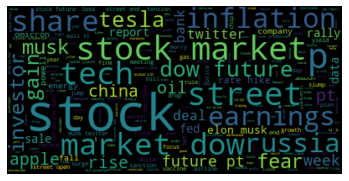

In [56]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path


noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

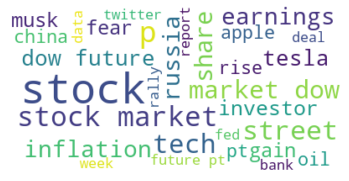

In [57]:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color='white', relative_scaling=.5).generate(noun_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [95]:
data["neg"] = np.nan
data["neu"] = np.nan
data["pos"] = np.nan
data["predict"] = ""
data

,Unnamed: 0,Title,Date,Publisher,neg,neu,pos,predict
0,0,sampleTitle,sampleDate,samplePublisher,NaN,NaN,NaN,
1,1,McDonald's ordered to face Byron Allen's $10 b...,2022-09-20 00:00:00,Reuters,NaN,NaN,NaN,
2,2,Stock Market Today: Dow Slides as Focus Shifts...,2022-09-20 00:00:00,Investing.com,NaN,NaN,NaN,
3,3,"Big bank CEOs to sell lawmakers on relief, div...",2022-09-20 00:00:00,Reuters,NaN,NaN,NaN,
4,4,Elon Musk faces skeptics as Tesla gets ready t...,2022-09-20 00:00:00,Reuters,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...
2681,2681,U.S. trade chief Tai says getting 'traction' w...,2021-11-10 00:00:00,Reuters,NaN,NaN,NaN,
2682,2682,Wall Street ends lower as economic data raises...,2021-11-10 00:00:00,Reuters,NaN,NaN,NaN,
2683,2683,"Stocks slip, dollar gains as US CPI sparks tig...",2021-11-10 00:00:00,Reuters,NaN,NaN,NaN,
2684,2684,S&P 500 Closes Lower as Soaring Inflation Rein...,2021-11-10 00:00:00,Investing.com,NaN,NaN,NaN,


In [100]:
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence, i):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    data["neg"][i] = sentiment_dict['neg']*100
    data["neu"][i] = sentiment_dict['neu']*100
    data["pos"][i] = sentiment_dict['pos']*100
    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    # print("Sentence Overall Rated As", end = " ")
    # # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        data["predict"][i] = "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        data["predict"][i] = "Negative"
    else :
        data["predict"][i] = "Neutral"

In [97]:
# Driver code
if __name__ == "__main__" :
    print("Text Selected for VADER Sentimental Analysis :")
    sentence1 = ('''ANN is like our brain; millions and billions of cells — called neurons, which processes information in the form of electric signals. Similarly, in ANN, the network structure has an input layer, a hidden layer, and the output layer. It is also called Multi-Layer Perceptron as it has multiple layers. The hidden layer is known as a “distillation layer” that distils some critical patterns from the data/information and passes it onto the next layer. It then makes the network quicker and more productive by distinguishing the data from the data sources, leaving out the excess data.''')
    print(sentence1)

Text Selected for VADER Sentimental Analysis :
ANN is like our brain; millions and billions of cells — called neurons, which processes information in the form of electric signals. Similarly, in ANN, the network structure has an input layer, a hidden layer, and the output layer. It is also called Multi-Layer Perceptron as it has multiple layers. The hidden layer is known as a “distillation layer” that distils some critical patterns from the data/information and passes it onto the next layer. It then makes the network quicker and more productive by distinguishing the data from the data sources, leaving out the excess data.


In [101]:
# function calling

for i in range(1,len(data)):
  sentiment_scores(data['Title'][i], i)


In [102]:
data

,Unnamed: 0,Title,Date,Publisher,neg,neu,pos,predict
0,0,sampleTitle,sampleDate,samplePublisher,NaN,NaN,NaN,
1,1,McDonald's ordered to face Byron Allen's $10 b...,2022-09-20 00:00:00,Reuters,17.4,82.6,0.0,Negative
2,2,Stock Market Today: Dow Slides as Focus Shifts...,2022-09-20 00:00:00,Investing.com,0.0,100.0,0.0,Neutral
3,3,"Big bank CEOs to sell lawmakers on relief, div...",2022-09-20 00:00:00,Reuters,0.0,73.2,26.8,Positive
4,4,Elon Musk faces skeptics as Tesla gets ready t...,2022-09-20 00:00:00,Reuters,10.1,71.9,18.0,Positive
...,...,...,...,...,...,...,...,...
2681,2681,U.S. trade chief Tai says getting 'traction' w...,2021-11-10 00:00:00,Reuters,0.0,100.0,0.0,Neutral
2682,2682,Wall Street ends lower as economic data raises...,2021-11-10 00:00:00,Reuters,38.4,61.6,0.0,Negative
2683,2683,"Stocks slip, dollar gains as US CPI sparks tig...",2021-11-10 00:00:00,Reuters,21.2,60.6,18.2,Negative
2684,2684,S&P 500 Closes Lower as Soaring Inflation Rein...,2021-11-10 00:00:00,Investing.com,18.0,82.0,0.0,Negative


In [103]:
# csv파일로 저장하기
data.to_csv('investingComPredict.csv', sep=',')

In [107]:
positive, negative, neutral = 0, 0, 0

for i in range(1,len(data)):
  if data["predict"][i] == "Positive" :
      positive += 1
  elif data["predict"][i] == "Negative" :
      negative += 1
  else :
      neutral += 1

In [112]:
total = negative + positive + neutral
print(negative, positive ,neutral)


950 745 990


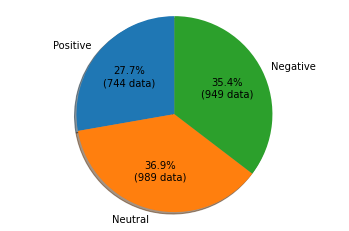

In [127]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [positive, neutral, negative]
                    
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} data)".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct = lambda pct: func(pct, sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()